## Завдання.  

+ Реалізуйте функцію для зчитування зображення з файлу та його відображення за допомогою бібліотеки OpenCV.  
+ Реалізуйте фільтр Собеля для зображення та відобразіть його результат. Реалізуйте медіанний фільтр для зображення та відобразіть його результат.  
+ Порівняйте результати фільтрів Собеля та медіанного фільтру та проілюструйте їх відмінності на зображенні.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def read_img(filename, show = True):
    img = cv.imread(filename)
    if show:
        cv.imshow('Original Image', img)
        cv.waitKey(0)
        cv.destroyAllWindows()
    return img        

In [7]:
filename = 'image.jpg'
img = read_img(filename, show=False)

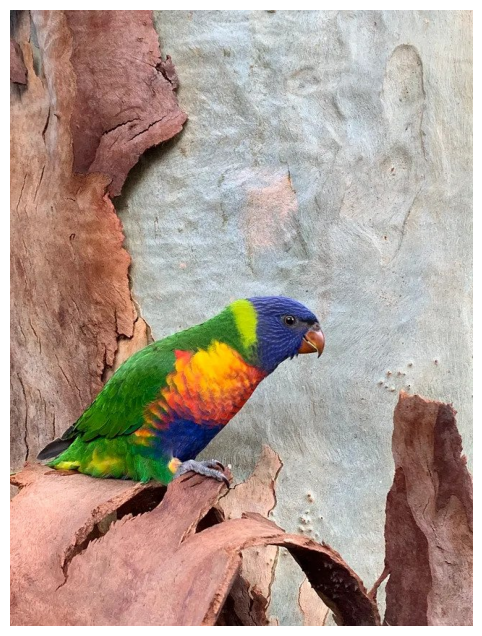

In [8]:
fig, _ = plt.subplots(figsize=(6, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB) )
plt.axis('off')
plt.show()

### Фільтр Собеля

In [11]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
ddept=cv.CV_16S
x = cv.Sobel(gray, ddept, 1,0, ksize=3, scale=1)
y = cv.Sobel(gray, ddept, 0,1, ksize=3, scale=1)
absx= cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)
edge = cv.addWeighted(absx, 0.5, absy, 0.5, 0)
filename = 'sobel.jpg'
cv.imwrite(filename, edge)
cv.imshow('edge', edge)
cv.waitKey(0)
cv.destroyAllWindows()

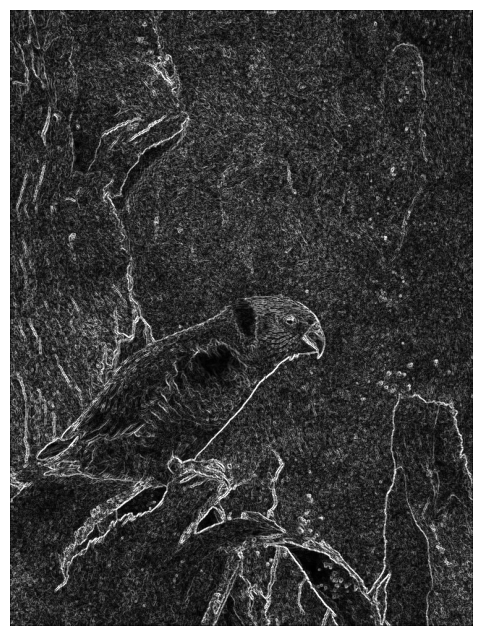

In [12]:
fig, _ = plt.subplots(figsize=(6, 8))
plt.imshow(edge, cmap='gray')
plt.axis('off')
plt.show()

### Медіанний фільтр

In [13]:
img_med = cv.medianBlur(img, 5)
filename = 'median.jpg'
cv.imwrite(filename, img_med)

True

In [14]:
cv.imshow('image', img_med)
cv.waitKey(0);
cv.destroyAllWindows();

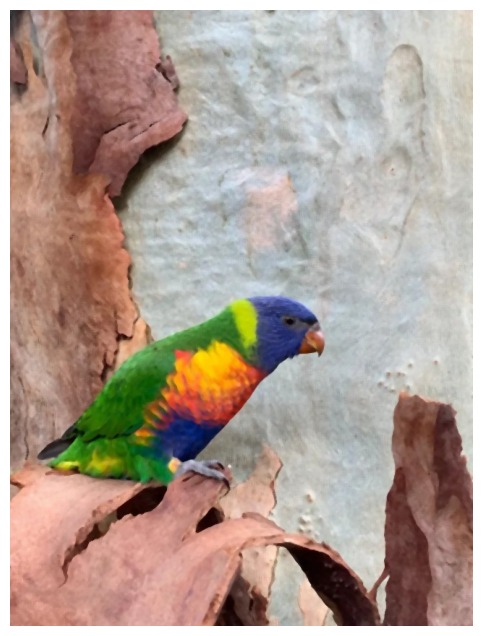

In [15]:
fig, _ = plt.subplots(figsize=(6, 8))
plt.imshow(cv.cvtColor(img_med, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Порівняння зображень

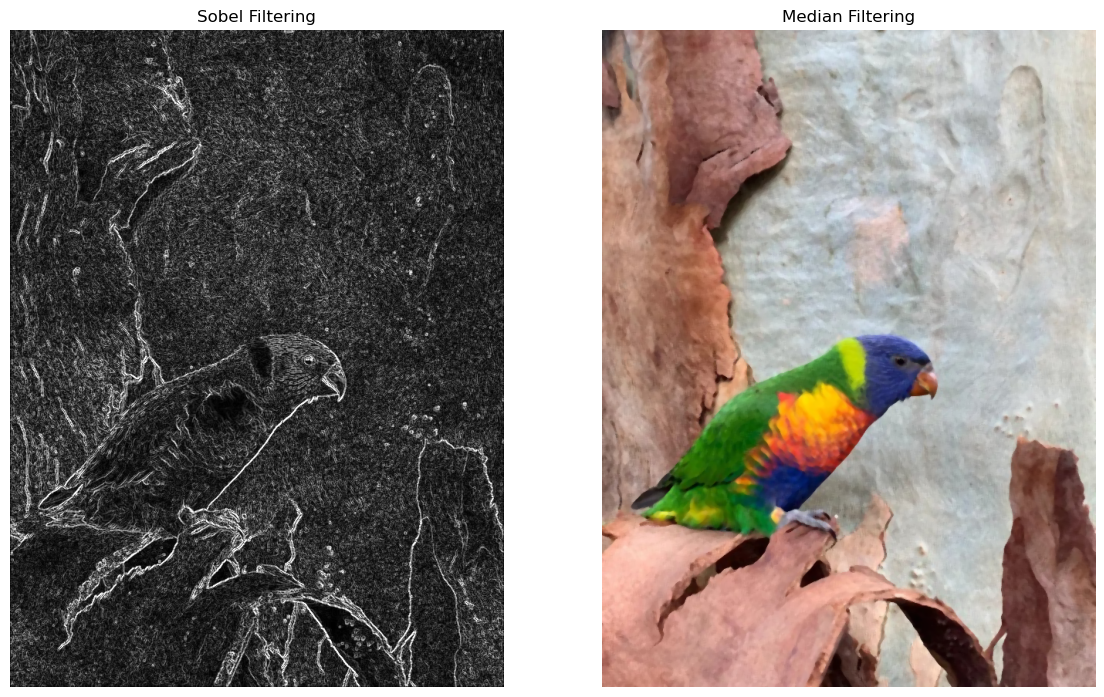

In [19]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(121)
plt.imshow(edge, cmap='gray')
plt.title('Sobel Filtering')
plt.axis('off')
ax = fig.add_subplot(122)
plt.imshow(cv.cvtColor(img_med, cv.COLOR_BGR2RGB))
plt.title('Median Filtering')
plt.axis('off')
plt.show()